# **Housing Price Prediction**
dataset : https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [118]:
# general library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extract Dataset

In [119]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# **EDA**

Kami memeriksa tipe data dan keberadaan nilai null menggunakan `df.info()`. Setelah itu, kami menghapus baris-baris yang mengandung nilai null dengan df.`dropna(inplace=True)`.
Kami kemudian mengecek kembali tipe data dan memastikan tidak ada nilai null yang tersisa. Selain itu, kami juga memeriksa dimensi dataset menggunakan `df.shape`.

## Data Exploration

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [121]:
df.dropna(inplace=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [123]:
df.shape

(20433, 10)

In [124]:
from sklearn.model_selection import train_test_split

x = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [125]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [127]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3658,-118.41,34.21,35.0,2215.0,459.0,1594.0,446.0,4.0167,<1H OCEAN,193200.0
2778,-115.73,33.35,23.0,1586.0,448.0,338.0,182.0,1.2132,INLAND,30000.0
8809,-118.41,33.75,4.0,311.0,51.0,128.0,46.0,9.8091,NEAR OCEAN,500001.0
11925,-117.40,33.95,43.0,633.0,166.0,292.0,135.0,1.1601,INLAND,121400.0
985,-121.84,37.66,13.0,13182.0,2074.0,4847.0,1950.0,5.6417,INLAND,352900.0
...,...,...,...,...,...,...,...,...,...,...
8497,-118.31,33.90,38.0,1400.0,399.0,1131.0,405.0,3.5417,<1H OCEAN,198400.0
4773,-118.34,34.03,48.0,1426.0,331.0,784.0,356.0,1.6581,<1H OCEAN,118800.0
12558,-121.45,38.54,47.0,1159.0,250.0,810.0,244.0,2.7787,INLAND,56000.0
18832,-122.92,41.70,23.0,4017.0,792.0,1634.0,619.0,2.3571,INLAND,62000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

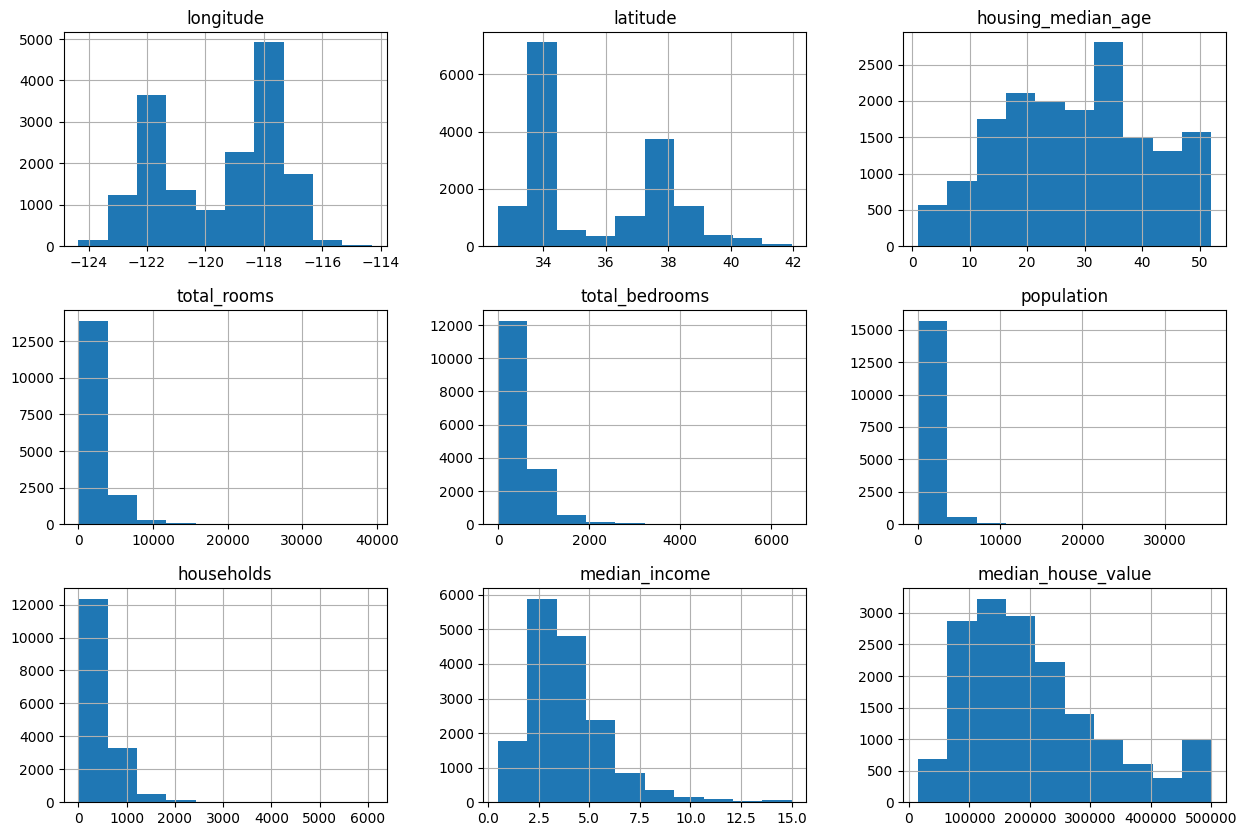

In [128]:
train_data.hist(figsize = (15, 10))

In [129]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923965,-0.110546,0.037923,0.060167,0.093458,0.048352,-0.012530,-0.043578
latitude,-0.923965,1.000000,0.012235,-0.029708,-0.058503,-0.102273,-0.064668,-0.081667,-0.148143
housing_median_age,-0.110546,0.012235,1.000000,-0.357977,-0.316793,-0.291650,-0.297954,-0.117522,0.107399
total_rooms,0.037923,-0.029708,-0.357977,1.000000,0.928708,0.855733,0.919328,0.199651,0.137430
total_bedrooms,0.060167,-0.058503,-0.316793,0.928708,1.000000,0.877771,0.981009,-0.009154,0.053427
population,0.093458,-0.102273,-0.291650,0.855733,0.877771,1.000000,0.905767,0.005164,-0.021944
households,0.048352,-0.064668,-0.297954,0.919328,0.981009,0.905767,1.000000,0.012486,0.069083
median_income,-0.012530,-0.081667,-0.117522,0.199651,-0.009154,0.005164,0.012486,1.000000,0.685182
median_house_value,-0.043578,-0.148143,0.107399,0.137430,0.053427,-0.021944,0.069083,0.685182,1.000000


<Axes: >

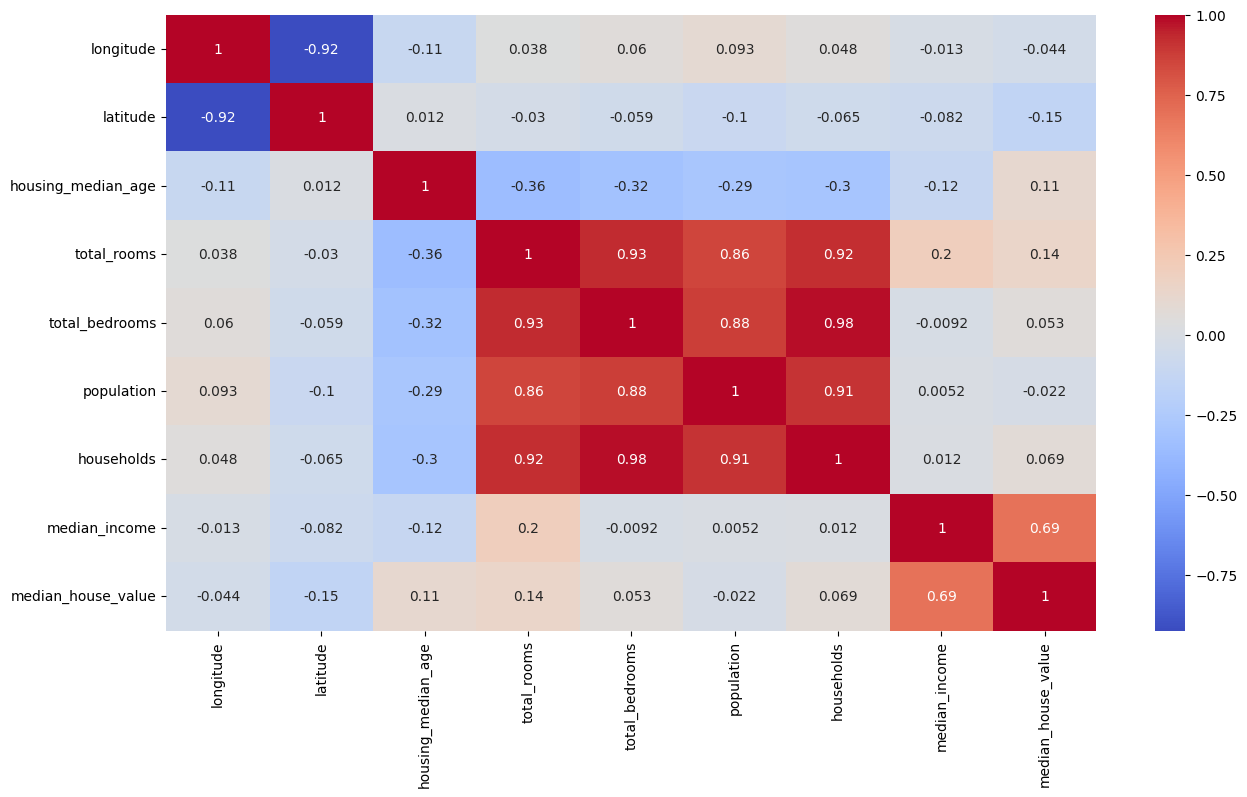

In [130]:
plt.figure(figsize=(15, 8))

sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

## Data Preprocessing

Pada tahap ini Kami melakukan transformasi logaritma `(dengan log1p)` pada kolom `total_rooms, total_bedrooms, population, dan households` guna mengatasi distribusi data yang miring.
Setelah transformasi, kami kembali membuat histogram untuk melihat perubahan distribusi data.

Untuk kolom kategorikal `ocean_proximity`, kami memeriksa nilai-nilai unik dan jumlah kemunculannya dengan `value_counts()`.
Kami kemudian melakukan one-hot encoding pada kolom tersebut menggunakan pd.`get_dummies()` dan menggabungkannya kembali ke `train_data`, lalu menghapus kolom aslinya.

Setelah one-hot encoding, kami menampilkan ulang `train_data` dan kembali memvisualisasikan matriks korelasi.
Kami juga membuat scatter plot dari kolom `latitude` dan `longitude`, yang diwarnai berdasarkan `median_house_value`, guna memahami distribusi harga rumah berdasarkan lokasi.


In [131]:
train_data['total_rooms'] = np.log1p(train_data['total_rooms'] * 1)
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'] * 1)
train_data['population'] = np.log1p(train_data['population'] * 1)
train_data['households'] = np.log1p(train_data['households'] * 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

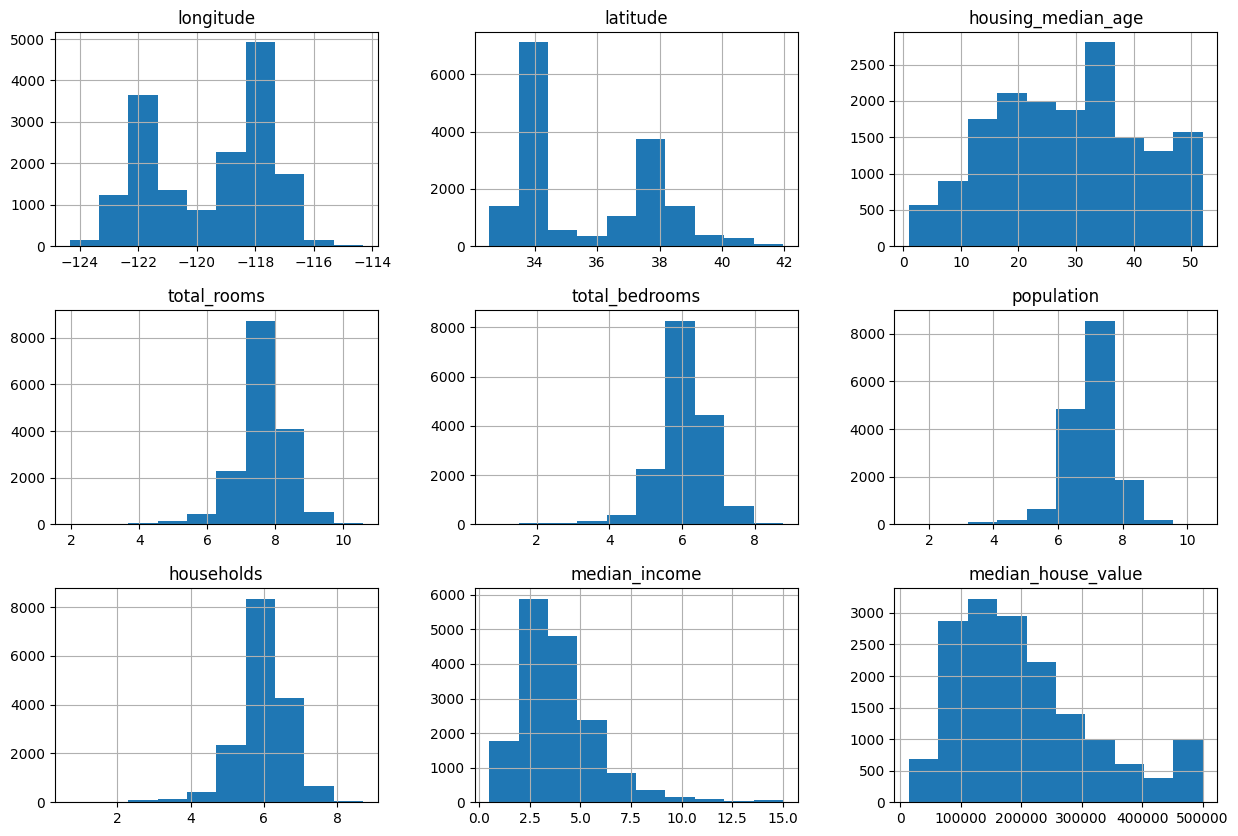

In [132]:
train_data.hist(figsize = (15, 10))

In [133]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7202
INLAND,5232
NEAR OCEAN,2091
NEAR BAY,1819
ISLAND,2


In [134]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [135]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3658,-118.41,34.21,35.0,7.703459,6.131226,7.374629,6.102559,4.0167,193200.0,True,False,False,False,False
2778,-115.73,33.35,23.0,7.369601,6.107023,5.826000,5.209486,1.2132,30000.0,False,True,False,False,False
8809,-118.41,33.75,4.0,5.743003,3.951244,4.859812,3.850148,9.8091,500001.0,False,False,False,False,True
11925,-117.40,33.95,43.0,6.452049,5.117994,5.680173,4.912655,1.1601,121400.0,False,True,False,False,False
985,-121.84,37.66,13.0,9.486683,7.637716,8.486322,7.576097,5.6417,352900.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8497,-118.31,33.90,38.0,7.244942,5.991465,7.031741,6.006353,3.5417,198400.0,True,False,False,False,False
4773,-118.34,34.03,48.0,7.263330,5.805135,6.665684,5.877736,1.6581,118800.0,True,False,False,False,False
12558,-121.45,38.54,47.0,7.056175,5.525453,6.698268,5.501258,2.7787,56000.0,False,True,False,False,False
18832,-122.92,41.70,23.0,8.298540,6.675823,7.399398,6.429719,2.3571,62000.0,False,True,False,False,False


<Axes: >

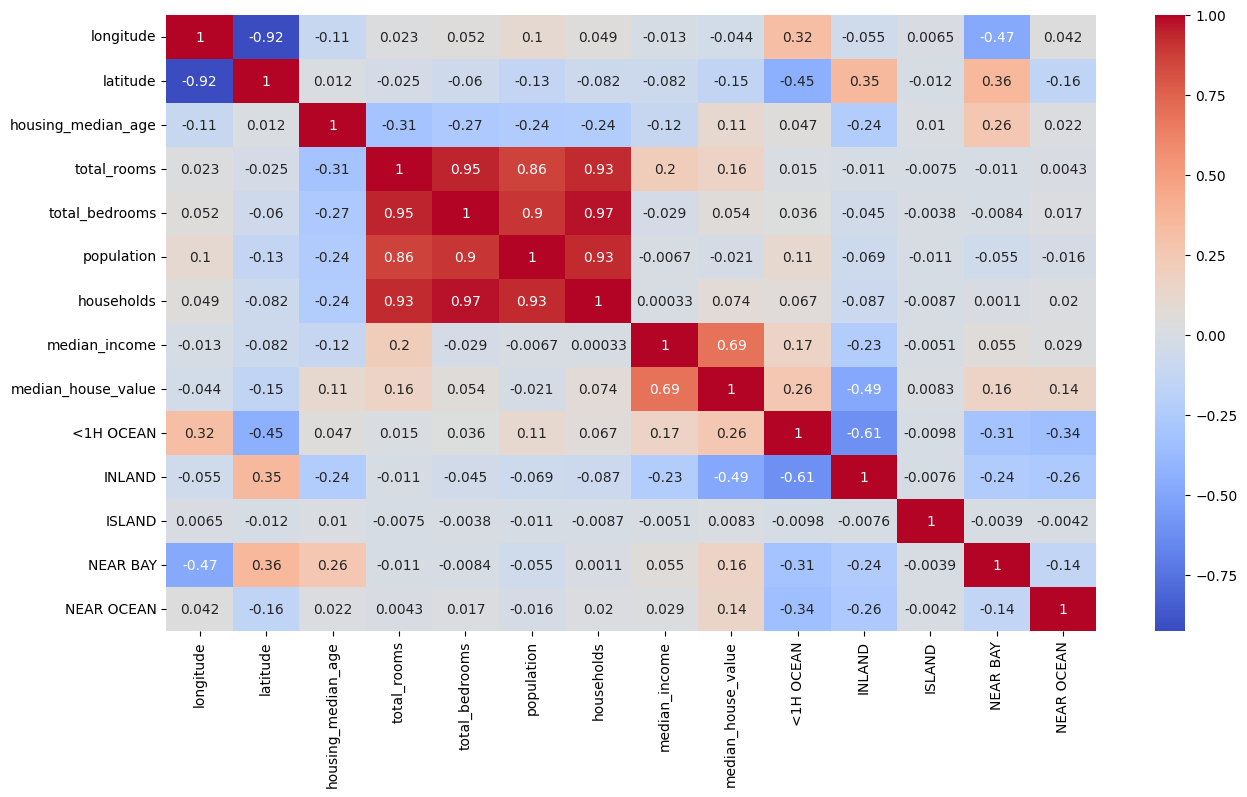

In [136]:
plt.figure(figsize=(15, 8))

sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

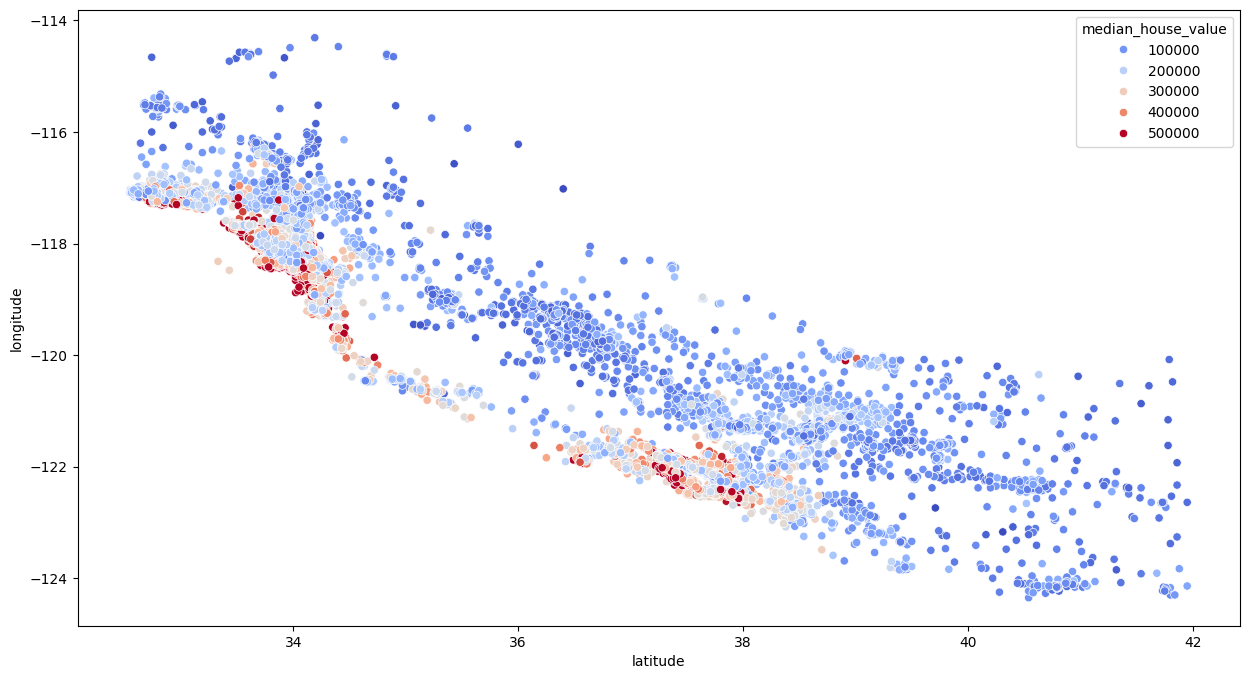

In [137]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x='latitude', y='longitude', hue='median_house_value', palette='coolwarm')

## Feature Engineering

Pada tahap ini Kami menambahkan dua fitur baru, yaitu `bedroom_ratio` (rasio jumlah kamar tidur terhadap total kamar) dan `household_rooms` (rasio total kamar terhadap jumlah rumah tangga).
Setelah penambahan fitur ini, kami memvisualisasikan kembali matriks korelasi untuk melihat pengaruhnya terhadap target.

In [138]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

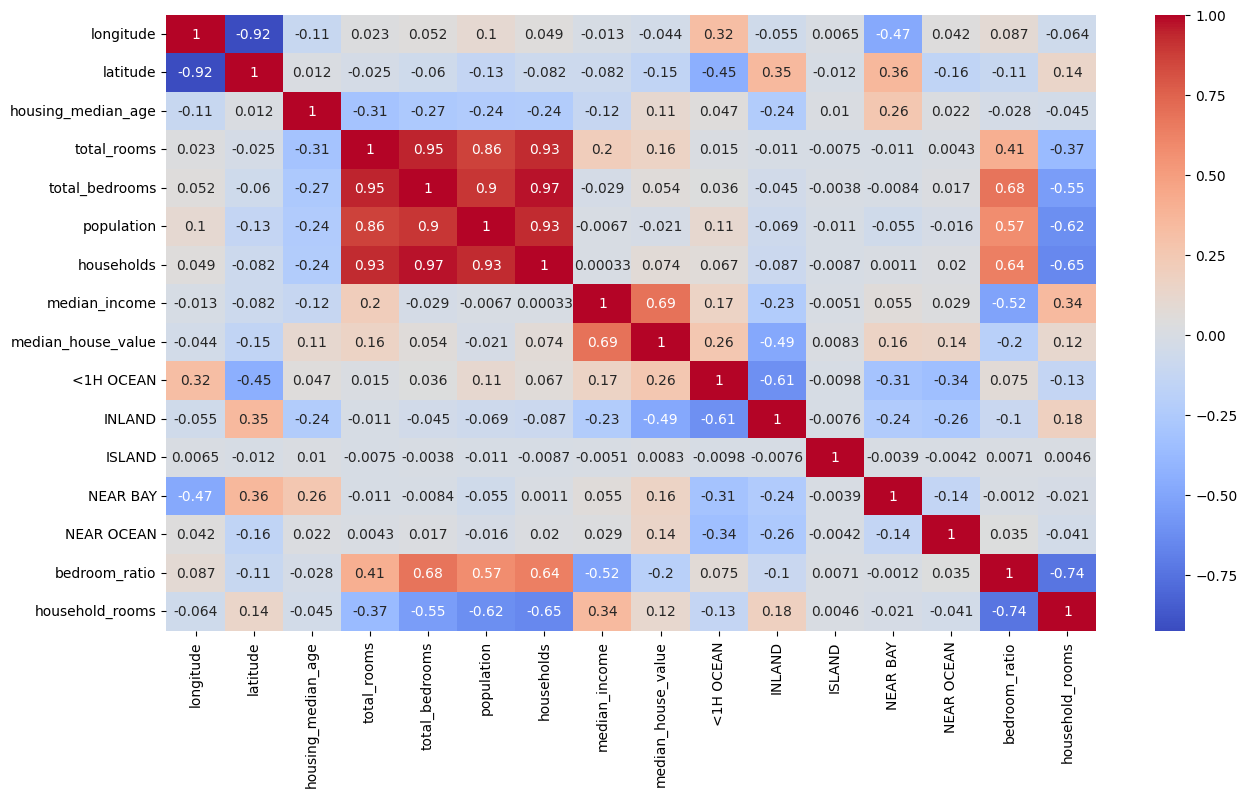

In [139]:
plt.figure(figsize=(15, 8))

sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Modelling

## Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [141]:
reg.score(X_train, y_train)

0.6699687981699374

In [142]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log1p(test_data['total_rooms'] * 1)
test_data['total_bedrooms'] = np.log1p(test_data['total_bedrooms'] * 1)
test_data['population'] = np.log(test_data['population'] * 1)
test_data['households'] = np.log(test_data['households'] * 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [143]:
X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']

In [144]:
reg = LinearRegression()

reg.fit(X_test, y_test)

LinearRegression()

In [145]:
lr_test_score = reg.score(X_test, y_test)

In [146]:
lr_test_score

0.6791647306616135

## Random Forest

In [147]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [148]:
forest_reg.score(X_train, y_train)

0.9743103868961536

In [149]:
forest_reg.fit(X_test, y_test)

RandomForestRegressor()

In [150]:
rf_test_score = forest_reg.score(X_test, y_test)

In [151]:
rf_test_score

0.9676700999430066

## PCA

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

In [153]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [154]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [155]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418
...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316


In [156]:
le = LabelEncoder()
y_encoded = le.fit_transform(df['ocean_proximity'])
y=pd.DataFrame(y_encoded,columns=['ocean_proximity'])

In [157]:
np.random.seed(42)
X=np.random.rand(1000,9)
Y=np.random.randint(0,5,1000)

In [158]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X)

In [159]:
pca.explained_variance_ratio_

array([0.12965733, 0.12204578])

In [160]:
pca.explained_variance_ratio_.sum()

np.float64(0.25170310613402885)

In [161]:
markers=['o','s','^','D','p']
colors=['red','blue','green','purple','orange']

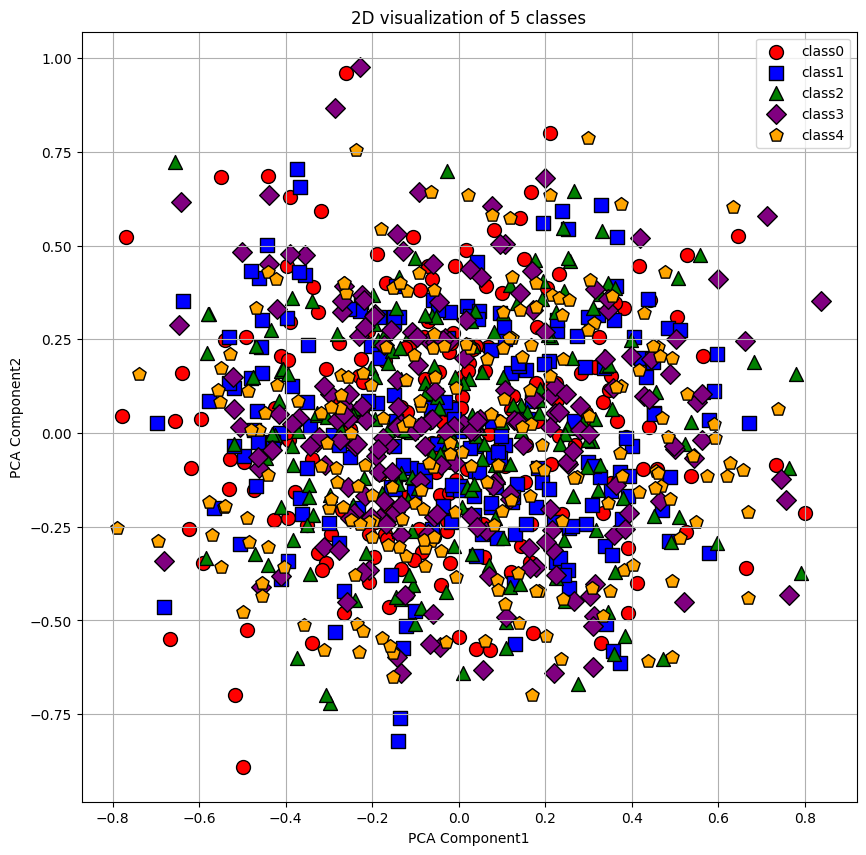

In [162]:
plt.figure(figsize=(10,10))
for class_value in np.unique(Y):
    selected_points=x_pca[Y==class_value]
    plt.scatter(selected_points[:,0],
                selected_points[:,1],
                marker=markers[class_value],
                color=colors[class_value],
               label=f'class{class_value}',
               edgecolor='black',
               s=100)
plt.xlabel('PCA Component1')
plt.ylabel('PCA Component2')
plt.legend()
plt.title('2D visualization of 5 classes')
plt.grid(True)
plt.show()

## SVM

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [172]:
# modelling

svm_model=SVC(kernel='rbf',C=1,gamma='scale')
svm_model.fit(x_train,y_train)

SVC(C=1)

In [173]:
y_train_predict=svm_model.predict(x_train)

y_test_predict=svm_model.predict(x_test)


In [174]:
accuracy_train=accuracy_score(y_train,y_train_predict)
ErrorRate_traindata=1-accuracy_train
print(f'Accuracy For Training Data :{accuracy_train*100:.2f}%')
print(f'Error Rate  For Training Data :{ErrorRate_traindata*100:.2f}%')

Accuracy For Training Data :86.28%
Error Rate  For Training Data :13.72%


In [175]:
svm_accuracy_test = accuracy_score(y_test,y_test_predict)
ErrorRate_testdata=1-svm_accuracy_test
print(f'Accuracy For Test Data :{svm_accuracy_test*100:.2f}%')
print(f'Error Rate  For Test Data :{ErrorRate_testdata*100:.2f}%')

Accuracy For Test Data :85.81%
Error Rate  For Test Data :14.19%


In [176]:
import warnings
warnings.filterwarnings('ignore')

In [177]:
Classification_Report=classification_report(y_test,y_test_predict,output_dict=True)
report_df = pd.DataFrame(Classification_Report).transpose()
print("Classification Report:\n")
print(report_df)

Classification Report:

              precision    recall  f1-score      support
0              0.833251  0.921009  0.874935  1823.000000
1              0.986588  0.909583  0.946522  1294.000000
2              0.000000  0.000000  0.000000     1.000000
3              0.703770  0.861538  0.774704   455.000000
4              0.804348  0.503891  0.619617   514.000000
accuracy       0.858087  0.858087  0.858087     0.858087
macro avg      0.665591  0.639204  0.643156  4087.000000
weighted avg   0.863546  0.858087  0.854118  4087.000000


# Visualisasi Komparasi Performa Model

Dalam praktik ini, kami telah mengikuti alur lengkap machine learning, mulai dari memuat data, eksplorasi awal, preprocessing, feature engineering, pembagian data, pemodelan, hingga evaluasi.
Kami juga membandingkan performa beberapa algoritma seperti Linear Regression, Random Forest, dan SVM.

Catatan penting:

- Penggunaan `np.log` vs `np.log1p` perlu diseragamkan agar hasilnya konsisten.

- Model seharusnya hanya dilatih di data pelatihan, lalu dievaluasi di data pengujian untuk memastikan generalisasi model.

- Bagian PCA dan SVM dilakukan sebagai eksperimen terpisah, dengan fokus pada klasifikasi `ocean_proximity` alih-alih regresi `median_house_value`.

Secara keseluruhan, praktik ini memberi kami pemahaman yang komprehensif tentang proses kerja machine learning, baik untuk regresi maupun klasifikasi

Perbandingan Performa Model:
------------------------------
Linear Regression (Regresi) - R-squared (Test): 0.6792
Random Forest (Regresi) - R-squared (Test): 0.9677
SVM (Klasifikasi) - Akurasi (Test): 0.8581
------------------------------


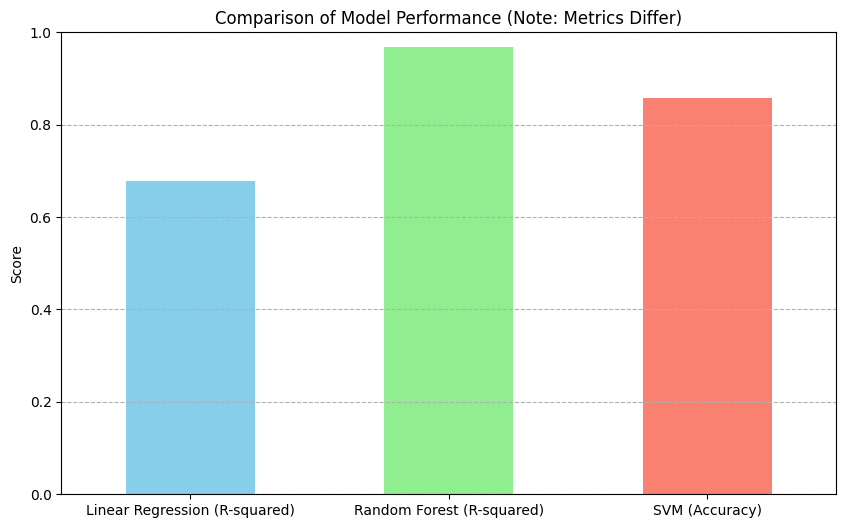


Visualisasi Perbandingan Performa Model:
Catatan: Linear Regression dan Random Forest menggunakan R-squared (untuk Regresi).
         SVM menggunakan Akurasi (untuk Klasifikasi).
         Nilai yang lebih tinggi umumnya menunjukkan performa yang lebih baik untuk metrik masing-masing.


In [178]:
print("Perbandingan Performa Model:")
print("-" * 30)
print(f"Linear Regression (Regresi) - R-squared (Test): {lr_test_score:.4f}")
print(f"Random Forest (Regresi) - R-squared (Test): {rf_test_score:.4f}")
print(f"SVM (Klasifikasi) - Akurasi (Test): {svm_accuracy_test:.4f}")
print("-" * 30)

# Jika Anda tetap ingin visualisasi (dengan catatan metriknya berbeda)
# Anda bisa membuat bar plot, tapi pastikan untuk mencatat perbedaan metriknya.
model_metrics = {
    'Linear Regression (R-squared)': lr_test_score,
    'Random Forest (R-squared)': rf_test_score,
    'SVM (Accuracy)': svm_accuracy_test
}

model_metrics_series = pd.Series(model_metrics)

plt.figure(figsize=(10, 6))
model_metrics_series.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Comparison of Model Performance (Note: Metrics Differ)')
plt.ylabel('Score') # Label umum karena metrik berbeda
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

print("\nVisualisasi Perbandingan Performa Model:")
print("Catatan: Linear Regression dan Random Forest menggunakan R-squared (untuk Regresi).")
print("         SVM menggunakan Akurasi (untuk Klasifikasi).")
print("         Nilai yang lebih tinggi umumnya menunjukkan performa yang lebih baik untuk metrik masing-masing.")